In [41]:
%matplotlib inline
import numpy as np
import matplotlib
import scipy
import uproot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# LLP Simulated Data

Jeff Jiang 

1840801

LLP is stand for long-lived particles, which could lose their kinetic energy and come to a standstill in the LHC detectors. In this assignment we going to investigate LLP simulated data. There were six root files was given. We named each of the file from A to F. First, we loaded all root files into a pandas Data Frame and then print out the top columns.

In [42]:
FileName = ["df_1.root","df_2.root","df_3.root","df_4.root","df_5.root","df_6.root"]
FileTree = ['pandas_tree218', 'pandas_tree51358', 'pandas_tree53278','pandas_tree52558','pandas_tree53038', 'pandas_tree54718']
Group = ['A','B','C','D','E','F']
NumFile = 6
trees = np.empty(NumFile,object)
for i in range(NumFile):
    tree =  uproot.open(FileName[i])[FileTree[i]]
    trees[i] = tree.pandas.df(["JetPt*", "JetEta*", "JetPhi*", "IsLLP*", "Lx", "Ly", "Lz"])
    trees[i] = trees[i].assign(Group=Group[i])[['Group'] + trees[i].columns.tolist()]
frames = pd.concat(trees)

We be used Jet pt, eta, phi, IsLLP, Lx, Ly, and Lz from each of the root file.

In [43]:
frameA = frames[(frames['Group']=='A')]
names = sorted(frameA)
print(names[1:])

['IsLLP', 'JetEta', 'JetPhi', 'JetPt', 'Lx', 'Ly', 'Lz']


pt - the transverse momentum of the proton to proton collisions in the LHC. It is in xy-plane. It is the momentum perpendicular to the beam direction.

eta - the pseudorapidity, the angle of the particle in the z-y plane which is the angle of a particle relative to the beam axis.

phi - The azimuthal angle, the angle of the particle in x-y plane which is the angle between a plane perpendicular to the beam.


We made a histogram of each of those plots. Also, for the transverse decay length (L_T) and the 3D decay length (L).

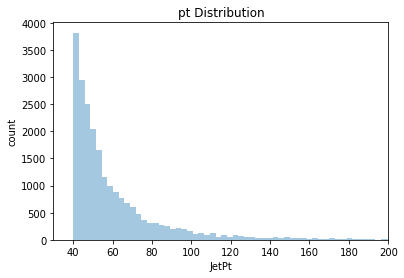

In [44]:
sns.distplot( frameA['JetPt'] , bins = 300, kde=False)
plt.xlim(30,200)
plt.title("pt Distribution")
plt.ylabel('count')
plt.show()

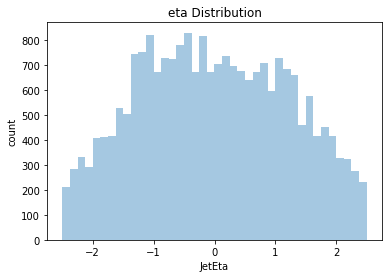

In [45]:
sns.distplot( frameA['JetEta'] , bins = 40, kde=False)
plt.title("eta Distribution")
plt.ylabel('count')
plt.show()

The Eta angle looks like for goes from $\frac{-3pi}{4}$ to $\frac{3pi}{4}$ 

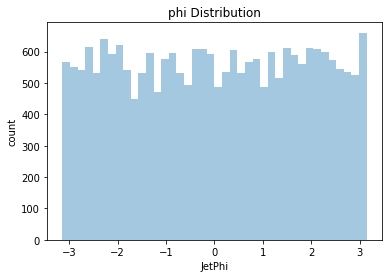

In [46]:
sns.distplot( frameA['JetPhi'] , bins = 40, kde=False)
plt.title("phi Distribution")
plt.ylabel('count')
plt.show()

The Phi angle looks like goes from $-pi$ to $pi$ 

In [47]:
LLPA = frameA[(frameA['IsLLP']==True)]

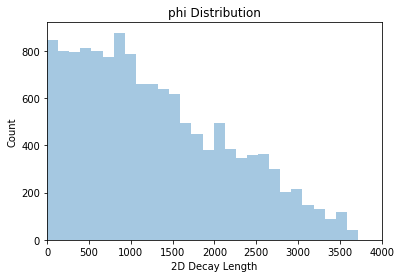

In [48]:
sns.distplot( np.hypot(LLPA['Lx'],LLPA['Ly']) , bins = 200, kde=False)
plt.title("phi Distribution")
plt.xlabel('2D Decay Length')
plt.ylabel('Count')
plt.xlim(0,4000)
plt.show()

The distribution of 2D decay length in the x and y plane

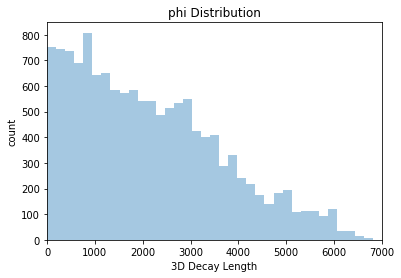

In [49]:
Lx = LLPA['Lx']
Ly = LLPA['Ly']
Lz = LLPA['Lz']
sns.distplot((Lx**2+Ly**2+Lz**2)**(1/2) , bins = 200, kde=False)
plt.title("phi Distribution")
plt.ylabel('count')
plt.xlabel('3D Decay Length') 
plt.xlim(0,7000)
plt.show()

The distribution of 3D decay length in the x, y, and z plane.

In [50]:
LLP = frames[(frames['IsLLP']==True)]
notLLP =frames[(frames['IsLLP']!=True)]

Below we use violin plots to show the jet pT for all samples A to F next to each other.

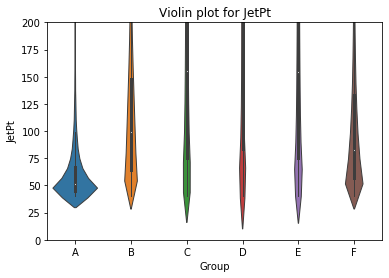

In [77]:
sns.violinplot(x ='Group', y = "JetPt", data=frames,linewidth = 1)
plt.title("Violin plot for JetPt")
plt.ylim(0,200)
plt.show()

Violin plot for JetPt from group A to F.

Below we use violin plots to show the jet pT, 2D decay lengths, and 3D decay lengths for all samples A to F next to each other.

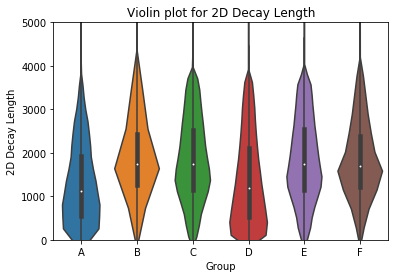

In [78]:
sns.violinplot(x='Group', y = np.hypot(LLP['Lx'],LLP['Ly']), data=LLP)
plt.title("Violin plot for 2D Decay Length")
plt.ylabel('2D Decay Length')
plt.ylim(0,5000)
plt.show()

Violin plot for 2D Decay Length from long-lived particles in group A to F.

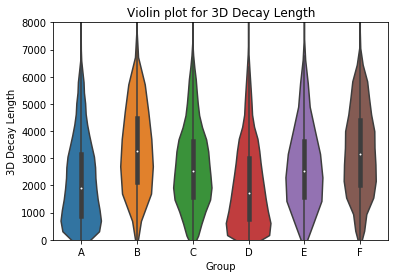

In [79]:
sns.violinplot(x='Group', y = (LLP['Lx']**2+LLP['Ly']**2+LLP['Lz']**2)**(1/2), data=LLP)
plt.title("Violin plot for 3D Decay Length")
plt.ylabel('3D Decay Length')
plt.ylim(0,8000)
plt.show()

Violin plot for 3D Decay Length from long-lived particles in group A to F.

We made the same plots but show (next to each other) the violin plots for jets that are associated with an LLP and not.

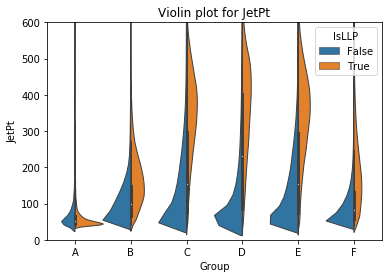

In [80]:
sns.violinplot(x='Group', y = "JetPt",hue='IsLLP', data=frames, split=True,width = 1,linewidth = 1)
plt.title("Violin plot for JetPt")
plt.ylim(0,600)
plt.show()

We selected 3 ranges of pt,and named low, medium, and high.

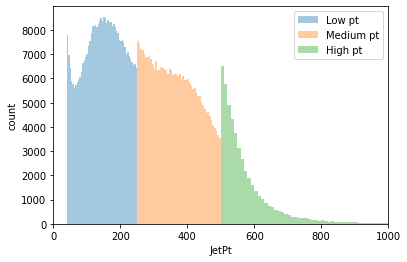

In [82]:
low = LLP[(LLP['JetPt'] >= 0) & (LLP['JetPt'] <= 250)]
medium = LLP[(LLP['JetPt'] >= 250) & (LLP['JetPt'] <= 500)]
high = LLP[(LLP['JetPt'] >= 500) & (LLP['JetPt'] <= 1000)]
sns.distplot( low['JetPt'] , kde=False,label= 'Low pt')
sns.distplot( medium['JetPt'] , kde=False,label= 'Medium pt')
sns.distplot( high['JetPt'] ,kde=False,label= 'High pt')
plt.legend()
plt.ylabel('count')
plt.xlim(0,1000)
plt.show()

We plotted a histogram that content the Lxy of different pt. We where unabler to see the evolution from the histogram.

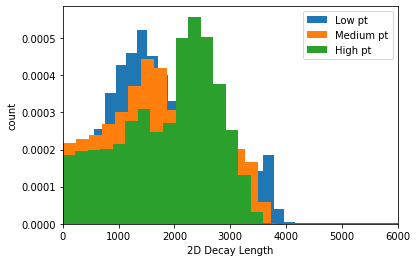

In [83]:
fig, ax = plt.subplots(1, 1)
ax.hist(np.hypot(low['Lx'],low['Ly']),200,density=True,label = 'Low pt')
ax.hist(np.hypot(medium['Lx'],medium['Ly']),200,density=True,label = 'Medium pt')
ax.hist(np.hypot(high['Lx'],high['Ly']),400,density=True,label = 'High pt')
plt.legend()
plt.ylabel('count')
plt.xlabel('2D Decay Length')
plt.xlim(0,6000)
plt.show()